In [4]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [8]:
df = pd.read_csv('spam.csv', encoding='utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte

In [9]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [10]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2253,ham,Lol enjoy role playing much?,NaN,NaN,NaN
1670,ham,Lmao!nice 1,NaN,NaN,NaN
4833,ham,I hope your pee burns tonite.,NaN,NaN,NaN
2759,ham,"Can meh? Thgt some will clash... Really ah, i ...",NaN,NaN,NaN
877,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,NaN,NaN,NaN


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(2)

,v1,v2
1236,ham,How much are we getting?
936,ham,"Since when, which side, any fever, any vomitin."


In [13]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4156,ham,This single single answers are we fighting? Pl...
2689,ham,"Ya ok, vikky vl c witin &lt;#&gt; mins and il..."
1520,spam,"URGENT! Your Mobile No was awarded a å£2,000 B..."
3776,spam,"Mila, age23, blonde, new in UK. I look sex wit..."
1227,ham,So Ì_'ll be submitting da project tmr rite?


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

ModuleNotFoundError: No module named 'sklearn'

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.sample(5)

,target,text
4039,0,I'm at home n ready...
2657,0,Dai &lt;#&gt; naal eruku.
431,0,Does she usually take fifteen fucking minutes ...
831,0,Hi mate its RV did u hav a nice hol just a mes...
3026,0,You still at the game?


In [18]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
# check for duplicate values
df.duplicated().sum()

0

In [21]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [23]:
df.shape

(5169, 2)

In [24]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

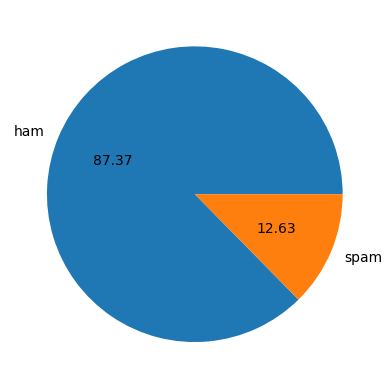

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
import nltk


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [35]:
df[['num_characters','num_words','num_sentences']].describe()
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

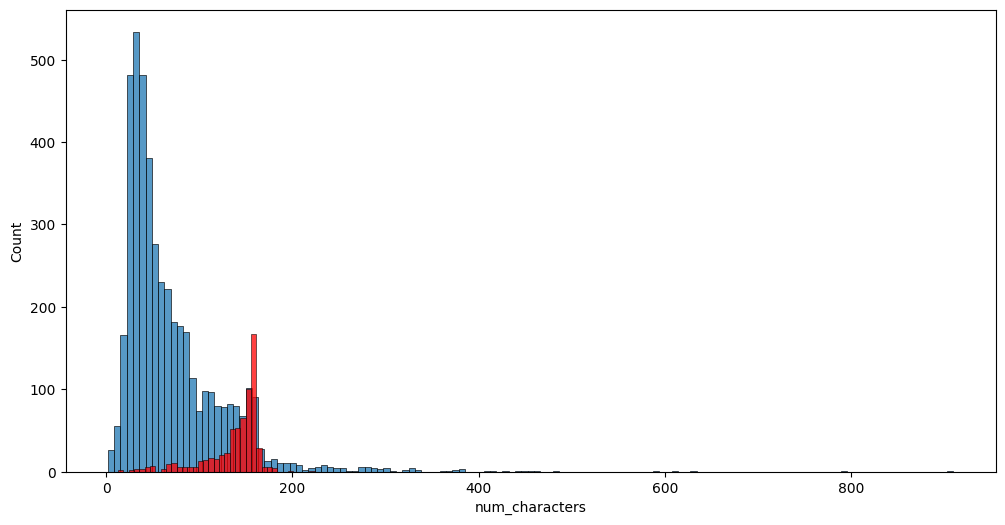

In [37]:
import seaborn as sns
# créer un histogramme des caractères de ham et spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

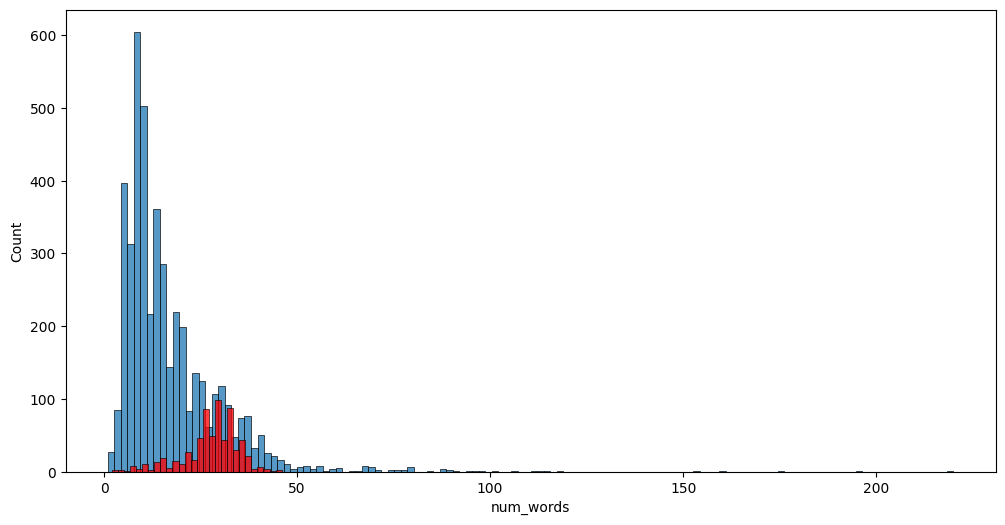

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

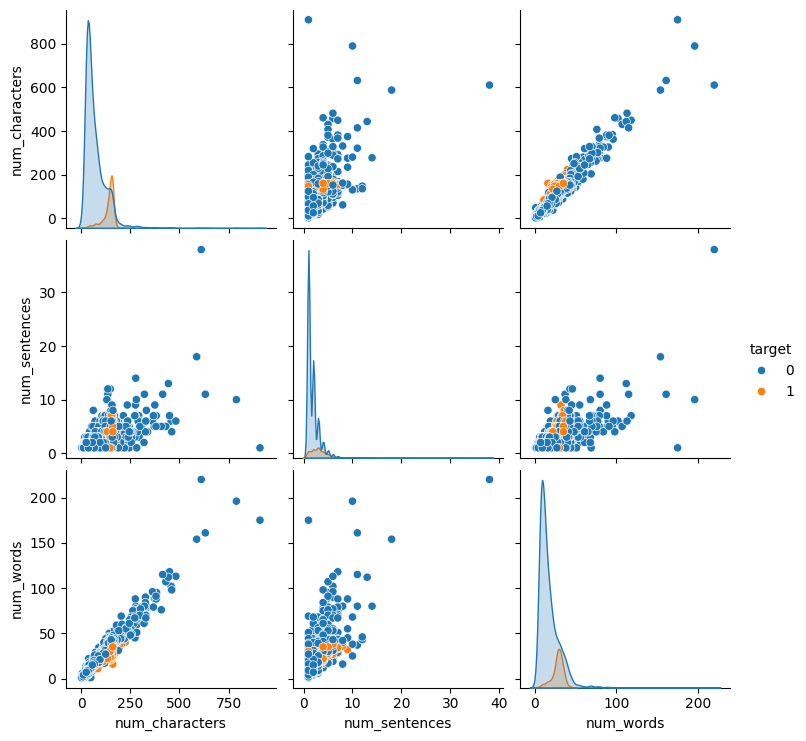

In [39]:
#comment les variables dans un DataFrame se rapportent les unes aux autres
sns.pairplot(df,hue='target')


In [49]:
''' Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming
'''
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [54]:
from nltk.stem import PorterStemmer
#stemmer de Porter pour réduire les mots à leur forme de base. 
ps = PorterStemmer()
stemmed_word = ps.stem('running')
print(stemmed_word)

run


In [55]:
df['transformed_text'] = df['text'].apply(transform_text)

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


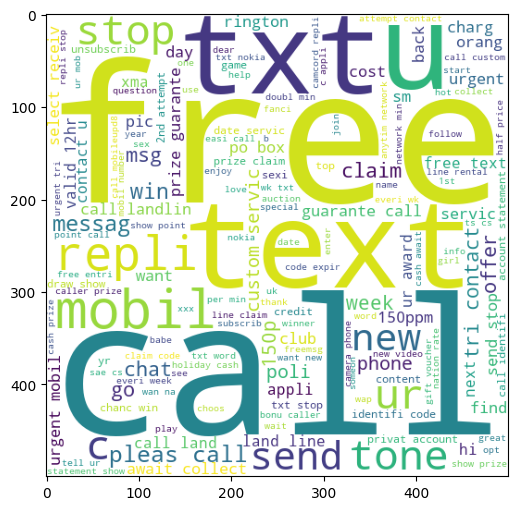

In [60]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)